In [ ]:
import pandas as pd
import plotly.express as px
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import scipy 
from scipy import stats
import scipy.stats as ss

import warnings
warnings.filterwarnings("ignore")
from plotly.subplots import make_subplots
import plotly.graph_objects as go
np.random.seed(123)
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC 
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, f1_score
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit

from sklearn.model_selection import GridSearchCV
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from sklearn.tree import plot_tree
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
import shap


In [ ]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [ ]:
# !jupyter nbconvert --to html MathProject.ipynb

In [ ]:
# !pip install shap

# Heart Disease - classification 

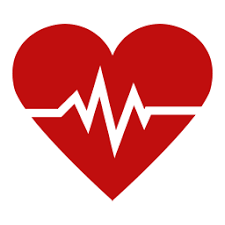

## Introduction
The heart disease dataset is a multivariate dataset containing 14 features, both numerical (Real and Integer) and categorical, more precisely 7 of them are categorical and the other 7 are numerical. This dataset is associated with a binary classification task.
It includes 303 rows associated with patients affected from a heart disease. The presence/absence of the disease is encoded by exploiting a binary variable. The value 0 is associated to the presence of a heart disease, the value 1 is associated with the absence of heart disease. 

Numerical features description:
* Age: age of the patient, expressed in years (*Integer values*)
* Resting Blood Pressure:Blood pressure at rest, measured in mmHg at the time of hospitalization (*Integer values*)
* Cholesterol: level of cholesterol, measured in mg/dl (*Integer values*)
* Max heart rate achieved: maximum heart rate achieved (*Integer values*)
* ST wave depression: ST depression induced by exercise relative to rest (*Real values*)
* Num of major vessels: Number of major vessels colored by fluoroscopy (0-3) (*Integer values*)

Categorical features description:
* Sex: patient' sex (male = 1 and female = 0)
* Chest pain type: chest pain experienced (1 = typical angina, 2 = atypical angina, 3 = non-anginal pain, 4 = asymptomatic)
* Fasting blood sugar (or Diabetes): measured in mg/dl (> 120 mg/dl). (1 = true, 0 = false)
* ECG at rest: resting electrocardiographic measurements. (0 = normal, 1 = having ST-T wave abnormality, 2 = showing probable left ventricular hypertropy)
* Exercise induced angina: Exercise induced angina (1 = yes, 0 = no) 
* ST wave slope: slope of the peak exercise ST segment (1 = upsloping, 2 = flat, 3 = downsloping)
* Thalassemia:	Blood disease Thalassemia (3 = normal, 6 = fixed defect, 7 = reversable defect)


# 1. Dataset Preparation
First, I checked for missing values. No missing values were found.
Important note, by doing some exploration over the data I noticed that many of the parameters that I would expect from my basic knowledge of heart disease and ECG analysis to be positively correlated, were actually pointed in the opposite direction, such as the level of cholesterol for healthy people were in general higher than for unhealthy peopele, or the fact that the younger a patient the more high the risk of observing a heart disease. 
Therefore I assumed that the target variable was reversed.  


In [ ]:
header = ['age', 'sex', 'chest_pain_type', 'resting_blood_pressure', 'cholesterol', 
              'fasting_blood_sugar', 'rest_ecg', 'max_heart_rate_achieved','exercise_induced_angina', 
              'st_depression', 'st_slope', 'num_major_vessels', 'thalassemia', 'target']

df = pd.read_csv("../input/heart-disease-uci/heart.csv")
df.columns = header
df.target = df.target.replace({0:1, 1:0})
df.head(10)

missing_values =df.isna().sum().sum()
print(f'Missing values found: {missing_values}')

Then, since for medical data, interpretability and readability are two of the most important characteristic, I converted the numeric values associated with categorical variables into descriptive values based on the description of the dataset previously mentioned. 
[https://archive.ics.uci.edu/ml/datasets/heart+disease](http://)

In [ ]:
df['sex'][df['sex'] == 0] = 'female'
df['sex'][df['sex'] == 1] = 'male'

df['chest_pain_type'][df['chest_pain_type'] == 0] = 'typical angina'
df['chest_pain_type'][df['chest_pain_type'] == 1] = 'atypical angina'
df['chest_pain_type'][df['chest_pain_type'] == 2] = 'non-anginal pain'
df['chest_pain_type'][df['chest_pain_type'] == 3] = 'asymptomatic'

df['thalassemia'][df['thalassemia'] == 0] = 'non present'
df['thalassemia'][df['thalassemia'] == 1] = 'normal'
df['thalassemia'][df['thalassemia'] == 2] = 'fixed defect'
df['thalassemia'][df['thalassemia'] == 3] = 'reversable defect'

df['fasting_blood_sugar'][df['fasting_blood_sugar'] == 0] = 'lower than 120mg/ml'
df['fasting_blood_sugar'][df['fasting_blood_sugar'] == 1] = 'greater than 120mg/ml'

df['rest_ecg'][df['rest_ecg'] == 0] = 'normal'
df['rest_ecg'][df['rest_ecg'] == 1] = 'ST-T wave abnormality'
df['rest_ecg'][df['rest_ecg'] == 2] = 'left ventricular hypertrophy'

df['exercise_induced_angina'][df['exercise_induced_angina'] == 0] = 'no'
df['exercise_induced_angina'][df['exercise_induced_angina'] == 1] = 'yes'

df['st_slope'][df['st_slope'] == 0] = 'upsloping'
df['st_slope'][df['st_slope'] == 1] = 'flat'
df['st_slope'][df['st_slope'] == 2] = 'downsloping'

df['num_major_vessels'][df['num_major_vessels'] == 4] = 'no occlusion'
df['num_major_vessels'][df['num_major_vessels'] == 3] = 'slight occlusion'
df['num_major_vessels'][df['num_major_vessels'] == 2] = 'medium occlusion'
df['num_major_vessels'][df['num_major_vessels'] == 1] = 'high occlusion'
df['num_major_vessels'][df['num_major_vessels'] == 0] = 'severe occlusion'


categorical = ['sex','chest_pain_type','fasting_blood_sugar','rest_ecg','exercise_induced_angina','st_slope',
               'thalassemia','num_major_vessels']
numeric = ['age', 'resting_blood_pressure', 'cholesterol', 'max_heart_rate_achieved','target']

df[categorical] = df[categorical].astype('category')
df[numeric] = df[numeric].astype(int).astype('int64')
df.head(10)


# 2. Exploratory Data Analysis
In statistics, exploratory data analysis (EDA) is an approach to analyze data sets in order to summarize
their main characteristics, often with visual methods. Primarily EDA is exploited in order to capture 
some information about the distribution of its components by using visual tools and statistical tools. 
The goal of EDA is to give a clear and understandable description of the data.
I decided to split the analysis into two parts: one related to the *quantitative* or numerical attributes, and one related to the *qualitative* or categorical attributes.
We can define categorical whose values are taken from a defined set of values, such as boolean values,and numerical features are instead features whose values are continuous or integer-valued. They are represented by numbers and possess most of the properties of numbers. 

In order get an idea of how data are distributed, below some statistics about the numerical features:
* Count: the number of samples
* Mean: the average value
* Std: the deviation from the mean value
* Min: the minimal value
* Max: the maximal value
* Quartiles: Indexes that divide in four equal parts the data distributions, in particular
25%: the lower quartile of the distribution
50%: the median quartile
75%: the upper quartile of the distribution**

In [ ]:
df[['age', 'resting_blood_pressure', 'cholesterol', 'max_heart_rate_achieved','st_depression']].describe().T

# 2.1 Labels distribution
One of the first most important thigs to do before applying any models, is to understand if the labels are equally distributed across the samples. In this case we say that the dataset is balanced. 
In our case the dataset is slightly imbalanced, in fact there are 9% more samples associated with the label "healthy = 1". In fact we can say that any dataset in which there is a disproportion between the minority class and the majority class is technically imbalanced. However, in this case we are not in the case of "Severe Imbalance" (1:100 or more), because the distribution of examples is uneven by a small amount, in fact the ratio between the amount of samples of the two classes does not overcome the "rule of thumb" ratio of 6:4 (about 1.5). I assume that the classification task will not be much skewed toward the majority class.

In [ ]:
palette = ['blue', 'red']

In [ ]:
fig = px.histogram(df, x = 'target', nbins =5, color = 'target', 
                   title = 'Count healthy and unhealthy patients (healthy = 0)', height = 400, 
                   width = 500, color_discrete_sequence= palette)
fig.show()
countDisease, countNoDisease = df.groupby(['target']).size()
print(f'Percentage of people having heart disease: {(countDisease/(countDisease+countNoDisease))*100:.1f}%')
print(f'Percentage of people not having heart disease: {(countNoDisease/(countDisease+countNoDisease))*100:.1f}%')

# 2.2 Sex and Age - an insight
Sex and age are two variables that  can affect primarily the insurgence of heart disease. 
The graph is showing the distribution of the Genders with respect to the target variable. At first glance we can notice that females are way less subject to heart disease than males, considering that in the dataset there are 31.7% samples associated with females and 68.3% samples associated with males.

In [ ]:
df_cross = pd.crosstab(df.sex, df.target)
data = []
#use for loop on every name to create bar data
for i,x in enumerate(df_cross.columns):
    data.append(go.Bar(name=str(x), x=df_cross.index, y=df_cross[x], marker_color= palette[i]))

figure = go.Figure(data)
figure.update_layout(barmode = 'group', 
                     title="Sex vs Heart Disease (healthy = 0)", width = 500, height = 400)

# barmode = 'group','stack','relative'
#For you to take a look at the result use
figure.show()

countFemale, countMale = df.groupby(['sex']).size()
print(f'Percentage of female patients: {(countFemale/(countMale+countFemale))*100:.1f}%')
print(f'Percentage of male patients: {(countMale/(countMale+countFemale))*100:.1f}%')

Below plotted the distribution of the age with respect to the target variable. As expected, the dataset proves how the age influences the insurgence of heart disorders. In fact the Graph suggests that the highest number of people suffering from heart diseases are in the age group of 55-65 years and the patients in the age group under 50 are very less likely to suffer from heart diseases.

In [ ]:
df_cross = pd.crosstab(df.age, df.target)
data = []
#use for loop on every name to create bar data
for i,x in enumerate(df_cross.columns):
    data.append(go.Bar(name=str(x), x=df_cross.index, y=df_cross[x], marker_color= palette[i]))

figure = go.Figure(data)
figure.update_layout(barmode = 'group', 
                     title="Age vs Heart Disease (healthy = 0)")

# barmode = 'group','stack','relative'
#For you to take a look at the result use
figure.show()

# 2.3 EDA on numerical attributes
As previously said, this dataset contains both categorical and numerical attributes that have to be treated and analyzed separately. 
The first group of attributes is formed by variables that are Integer/Real-valued therefore *quantitative*.

To examine the distribution of the numeric attributes in each label, Histograms, Boxplots and Pairplots were exploited.
### Boxplot
boxplots are tools to display the data distribution based on a five number summary (“minimum”, first quartile (Q1), median, third quartile (Q3), and “maximum”).

* median (Q2/50th Percentile): the middle value of the dataset.
* first quartile (Q1/25th Percentile): the middle number between the smallest number (not the “minimum”) and the median of the dataset.
* third quartile (Q3/75th Percentile): the middle value between the median and the highest value (not the “maximum”) of the dataset.
* interquartile range (IQR): 25th to the 75th percentile.
* “maximum”: Q3 + 1.5*IQR
* “minimum”: Q1 -1.5*IQR
* The spacings between the different parts of the box indicate the degree of dispersion (spread), skewness in the data, and show outliers. In fact, Box plot are not only excellent tools to understand the distribution of an attribute but also for detecting outliers. 


### Histograms
Histograms are the most commonly used graphs to show the underlying frequency distribution (shape) of a set of continuous data. This allows the inspection of the data for its underlying distribution (e.g., normal distribution), outliers or skewness. 


### PairPlot
PairPlots are useful tools provided by Seaborn. A pairplot plot a pairwise relationships in a dataset. The pairplot function creates a grid of Axes such that each variable in data will by shared in the y-axis across a single row and in the x-axis across a single column.

Below histograms and boxplots sharing x-axis:

In [ ]:
for i,attr in enumerate(['age', 'resting_blood_pressure', 'cholesterol', 'max_heart_rate_achieved','st_depression']):
    
    f, (ax_box1,ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (0.2,0.8)}, 
                                                 figsize = (10,7))
    f.suptitle(f'{attr}')
    sns.boxplot(df[attr], ax=ax_box1, color = sns.color_palette('hsv')[i])
    sns.distplot(df[attr], ax=ax_hist, color = sns.color_palette('hsv')[i])
    ax_box1.set_xlabel('')


Overall the data distribution can be considered normal. Only the ST depression attribute has a particular skewed distribution.

Below each attribute is analyzed in each label: 

In [ ]:

for attr in ['age', 'resting_blood_pressure', 'cholesterol', 'max_heart_rate_achieved','st_depression']:
    f, (ax_box1,ax_box2, ax_hist) = plt.subplots(3, sharex=True, gridspec_kw={"height_ratios": (.12, .12, .76)}, 
                                                 figsize = (12,8))
    f.suptitle(f'{attr} (0 = healthy, 1 = unhealthy)')
    # Add a graph in each part
    sns.boxplot(df[attr][df["target"]==0], ax=ax_box1, color = palette[0])
    sns.boxplot(df[attr][df["target"]==1], ax=ax_box2,color =palette[1])
    sns.distplot(df[attr][df["target"]==0], ax=ax_hist, color = palette[0])
    sns.distplot(df[attr][df["target"]==1], ax=ax_hist, color = palette[1])
    # Remove x axis name for the boxplot
    ax_box1.set_ylabel('0', rotation='horizontal')
    ax_box2.set_ylabel('1', rotation='horizontal')
    ax_box1.set_xlabel('')
    ax_box2.set_xlabel('')
    


By observing the boxplots we can assume that for many attributes there are not many significative differences between the distributions associated with the target variables, such as the Resting blood pressure or the level of cholesterol (which is by the way slightly higher for people who suffer from heart disease). However the Heart Rate achieved by healthy people is way more high than the heart rate achieved by ill people. 


Below the analysis of each attribute by considering age and sex. So these visualizations provide us information about how each of the quantitative attributes is distributed with respect to age and sex:

In [ ]:
for i,attr in enumerate(["age","resting_blood_pressure","cholesterol","max_heart_rate_achieved","st_depression"]):
    fig = px.box(df, x = "sex", y = attr, color = 'target', width = 800, height = 400, color_discrete_sequence= palette[::-1])
    fig.show()

For the pairplots visualization it is important to Standardize (see par. 3.2 for details) the data since we cannot compare different measures on different scales:

In [ ]:
scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(df[['age', 'resting_blood_pressure', 
                                    'cholesterol', 'max_heart_rate_achieved','st_depression']]), columns = ['age', 'resting_blood_pressure', 
                                    'cholesterol', 'max_heart_rate_achieved','st_depression'])
X_scaled['target'] = df['target']

In [ ]:
plt.figure(figsize=(16, 10))
sns.pairplot(X_scaled,
             hue='target', palette = palette,
           markers=['o','o'], plot_kws=dict(s=25, alpha=0.75, ci=None)
            )
plt.show()

# 2.3.4 Correlation - numerical Attributes
In order to understand the relationships between the attributes Correlation Matrix is used.
Computing the correlation matrix means to compute the Pearson Correlation coefficient between every pair of attributes.
In fact correlation is a technique for investigating the relationship between two quantitative, continuous variables (i.e. levels of cholesterol and age) and Pearson's correlation coefficient is a measure of the strength of the association between the two variables.
 

Pearson's correlation coefficient is a statistic that measures linear correlation between two variables X and Y and it is computed as the covariance of the two variables divided by the product of their standard deviations. 
Standard Deviation measures the absolute variability of a datasets’ distribution.
When dividing covariance values by the standard deviation, we essentially scale the value
down to a limited range of [-1, +1].
> $$\rho = \frac{\text{cov}(X,Y)}{\sigma_x \sigma_y}$$

A correlation coefficient of 1 means that for every positive increase in one variable, there is a positive increase of a fixed proportion in the other.
A correlation coefficient of -1 means that for every positive increase in one variable, there is a negative decrease of a fixed proportion in the other.
Zero means that for every increase, there isn’t a positive or negative increase. The two just aren’t related by a linear relationship.

In [ ]:
plt.figure(figsize = (10,6))
sns.heatmap(df.corr(), annot=True)

What we can understand from the correlation matrix is that our numeric attributes are not heavily correlated between them. None of them in fact shows a Correlation coefficient > 0.5 (meaning stron positive correlation).
Each of them may be useful in classification task, carrying its own amount of information.
Furthermore, there are some interesting correlations with the target variable: the most correlated is the variable related to the shape (depression) of ST segment in the ECG wave. Probably many ECG traces showed a very heavy deformation of the ST wave concurrently to a possible heart disease. 
 


The Pearson correlation matrix can help us to understand that maybe we probably must include the majority of all the features.
Therefore,
* data are very less correlated between them, so this means that in our model we will need the majority of them 
* The max heart rate achieved shows a positive correlation with the target meaning that lower heart capacity can be a sign of heart disease 
* Then the shape of the ST segment may be significative in identifying a heart failure 
* The heart rate *variability* is negatively correlated to the possibility of heart disease. In literature, a high heart variability is often a sign of healthy heart.

# 2.4 EDA for categorical variables

This simple representation shows the percentages of each category for every categorical variable. It can be helpful to understand how many samples related to each category are there in the dataset.

In [ ]:
f1, axs = plt.subplots(2,2,figsize=(15,10))

f1.tight_layout()

sns.countplot(df.sex,data=df,ax=axs[0][0], palette = "magma")
for p in axs[0][0].patches:
    height = p.get_height()
    axs[0][0].text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format(height/float(len(df.sex))),
            ha="center")         
        
sns.countplot(df.exercise_induced_angina,data=df,ax=axs[0][1], palette ="magma")
for p in axs[0][1].patches:
    height = p.get_height()
    axs[0][1].text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format(height/float(len(df.exercise_induced_angina))),
            ha="center") 
    
sns.countplot(df.st_slope,data=df,ax=axs[1][1],palette = "magma")
for p in axs[1][1].patches:
    height = p.get_height()
    axs[1][1].text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format(height/float(len(df.st_slope))),
            ha="center") 
    
sns.countplot(df.chest_pain_type,data=df,ax=axs[1][0], palette ="magma")
for p in axs[1][0].patches:
    height = p.get_height()
    axs[1][0].text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format(height/float(len(df.chest_pain_type))),
            ha="center") 

f2, axs2 = plt.subplots(2,2,figsize=(15,8))

f2.tight_layout()
sns.countplot(df.fasting_blood_sugar,data=df,ax=axs2[0][0], palette = "magma")
for p in axs2[0][0].patches:
    height = p.get_height()
    axs2[0][0].text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format(height/float(len(df.fasting_blood_sugar))),
            ha="center") 
    
sns.countplot(df.rest_ecg,data=df,ax=axs2[1][0], palette = "magma")
for p in axs2[1][0].patches:
    height = p.get_height()
    axs2[1][0].text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format(height/float(len(df.rest_ecg))),
            ha="center")
    
    
sns.countplot(df.num_major_vessels,data=df,ax=axs2[0][1],palette ="magma")
for p in axs2[0][1].patches:
    height = p.get_height()
    axs2[0][1].text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format(height/float(len(df.num_major_vessels))),
            ha="center")
    
    
sns.countplot(df.thalassemia,data=df,ax=axs2[1][1], palette = "magma")
for p in axs2[1][1].patches:
    height = p.get_height()
    axs2[1][1].text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format(height/float(len(df.thalassemia))),
            ha="center")

Now each category, for every categorical variable, is plotted with respect to the target variable. This is useful to understand relationships between a specific category and the target.

In [ ]:
f1, axs = plt.subplots(2,2,figsize=(15,10))

f1.tight_layout()

sns.countplot(df.target,hue="sex",data=df,ax=axs[0][0], palette = "magma")
for p in axs[0][0].patches:
    height = p.get_height()
    axs[0][0].text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format(height/float(len(df.sex))),
            ha="center") 
    
sns.countplot(df.target,hue="exercise_induced_angina",data=df,ax=axs[0][1], palette = "magma")
for p in axs[0][1].patches:
    height = p.get_height()
    axs[0][1].text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format(height/float(len(df.exercise_induced_angina))),
            ha="center") 
    
sns.countplot(df.target,hue="st_slope",data=df,ax=axs[1][1],palette = "magma")
for p in axs[1][1].patches:
    height = p.get_height()
    axs[1][1].text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format(height/float(len(df.st_slope))),
            ha="center") 


sns.countplot(df.target,hue="chest_pain_type",data=df,ax=axs[1][0], palette = "magma")
for p in axs[1][0].patches:
    height = p.get_height()
    axs[1][0].text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format(height/float(len(df.chest_pain_type))),
            ha="center") 

f2, axs2 = plt.subplots(2,2,figsize=(15,8))

f2.tight_layout()
sns.countplot(df.target,hue="fasting_blood_sugar",data=df,ax=axs2[0][0], palette = "magma")
for p in axs2[0][0].patches:
    height = p.get_height()
    axs2[0][0].text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format(height/float(len(df.fasting_blood_sugar))),
            ha="center") 

sns.countplot(df.target,hue="rest_ecg",data=df,ax=axs2[1][0], palette = "magma")
for p in axs2[1][0].patches:
    height = p.get_height()
    axs2[1][0].text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format(height/float(len(df.rest_ecg))),
            ha="center")

sns.countplot(df.target,hue="num_major_vessels",data=df,ax=axs2[0][1],palette = "magma")
for p in axs2[0][1].patches:
    height = p.get_height()
    axs2[0][1].text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format(height/float(len(df.num_major_vessels))),
            ha="center")

sns.countplot(df.target,hue="thalassemia",data=df,ax=axs2[1][1], palette = "magma")
for p in axs2[1][1].patches:
    height = p.get_height()
    axs2[1][1].text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format(height/float(len(df.thalassemia))),
            ha="center")

# 3. Data Preprocessing
Data preprocessing is mainly the most important step in a Machine Learning pipeline. 
In this phase raw data are transformed into model-suitable data.

# 3.1 Feature Encoding
Feature encoding is basically given by transformations on the data such that it can be easily accepted as input for machine learning algorithms while still retaining its original meaning.
In this case I encoded the categorical variables using dummy variables and dropping the first one.
Dummy coding is very useful since it allows to turn categories into something that the model can treat as having a high (1) and low (0) score.

In [ ]:
X = pd.get_dummies(df, drop_first=True)
X.head(10)

# 3.2 Train Test Split and Standardization
Machine Learning Algorithms have to be first trained on a subset of data called *train set* and then tested in order to assess the performances of the algorithm itself. Training data is data used to let the machine learning algorithm to build the model. The model tries to learn the dataset and its characteristic in order to be able to perform well on unseen data or *test data*. Test data is the part of the dataset used to test our model hypothesis. This is a keypoint, the test data must not be seen by the model, or the model will overfit on them.
As previously said test data is left untouched until the model and hyperparameters are decided, and it's only when the model is applied on them that we can get an accurate measure of how it would perform when deployed on real-world data.

In order to do that, data is split into the two parts by specifying the parameter *split ratio* which is highly dependent on the type of model we are building and the dataset itself. If our dataset and model are such that a lot of training is required, then we use a larger chunk of data just for training purposes. In this case I set the split ratio at 0.80, so that 80% of the data goes to train set and 20% of the data goes on test set. 

In [ ]:
rand = 42
target = X['target']
X = X.drop('target', axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, target, train_size = 0.80, stratify = target, random_state = rand)

## Standardization
Standardize the data is an important step that have to be applied when we compare measurements that have different units.
In fact variables that are measured at different scales may not equally contribute to the analysis resulting in some bias.
Therefore, I tried to standardize my data in order bring data at the same scale. 
Data standardization is a preprocessing technique that allows rescaling data to have a
0 mean and a standard deviation of 1. The standard score of every value is calculated in this way: 
> $$Z = \frac{x − µ}σ$$

After standardization data looks like:

In [ ]:
scaler = StandardScaler()
scaler.fit(X_train)

X_train_std = pd.DataFrame(scaler.fit_transform(X_train), index = X_train.index, columns = X_train.columns)
X_test_std = pd.DataFrame(scaler.transform(X_test), columns = X_test.columns)

In [ ]:
plt.figure(figsize =(8,8))
for i in ["age","resting_blood_pressure","cholesterol","max_heart_rate_achieved","st_depression"]:
    sns.distplot(X_train_std[i], hist = False, label = i)

# 3.3 Outlier detection

*“Observation which deviates so much from other observations as to arouse suspicion it was generated by a different mechanism” — Hawkins(1980).*
 
Outliers are extreme values that deviate from other observations on data, they may indicate a variability in a measurement, experimental errors or a novelty. In other words, an outlier is an observation that diverges from an overall pattern on a sample.
Outliers can come from
* Data Entry Errors: Human errors such as errors caused during data collection, recording, or entry can cause outliers in data.
* Measurement Error: It is the most common source of outliers. This is caused when the measurement instrument used turns out to be faulty.
* Natural Outlier: When an outlier is not artificial (due to error), it is a natural outlier. Most of real world data belong to this category.

I will present two methods for outlier detection:
1. outlier detection based on IQR
2. outlier detection exploiting Isolation Forests

# 3.3.1 Outlier detection based on IQR
A commonly used rule says that a data point is an outlier if it is more than 1.5 * IQR above the third quartile or below the first quartile. Said differently, low outliers are below Q1 – 1.5 * IQR and high outliers are above Q3 + 1.5 * IQR
Rouglhy speaking, the interquartile range can be used to detect outliers. Even if it is a robust technique, we have to notice that the interquartile range allow us to identify univariate outliers, so a data point that consists of an extreme value on one variable.  A multivariate outlier is instead a combination of unusual scores on at least two variables. 
The procedure is:
1.	Calculate the interquartile range for the data.
2.	Multiply the interquartile range (IQR) by 1.5 (a constant used to discern outliers).
3.	Add 1.5 x (IQR) to the third quartile. Any number greater than this is a suspected outlier.
4.	Subtract 1.5 x (IQR) from the first quartile. Any number less than this is a suspected outlier.

In figure below, the boxplots evidences the presence of several outliers that can be therefore easily detected and removed by exploiting the IQR. 
However this technique allow us to identify outliers that are 'univariate', so outliers that can be found when looking at a distribution of values in a single feature space.

In [ ]:
X_train_IQR = X_train_std
y_train_IQR = y_train

for attr in ['age', 'resting_blood_pressure', 'cholesterol','max_heart_rate_achieved','st_depression']:
    indexToDrop = []
    Q1 = X_train_IQR[attr].quantile(0.25)
    Q3 = X_train_IQR[attr].quantile(0.75)
    IQR = Q3 - Q1
    low = Q1 - IQR*1.5
    upp = Q3 + IQR*1.5
    ind = X_train_IQR[(X_train_IQR[attr] < low ) | (X_train_IQR[attr] > upp)].index
    if len(ind) != 0:
        X_train_IQR = X_train_IQR.drop(ind)
        y_train_IQR = y_train_IQR.drop(ind)

Below displayed the boxplots of the distributions without outliers:

In [ ]:
fig = make_subplots(rows=1, cols=5, subplot_titles=("Age", 
                                                    "resting blood pressure",
                                                    "cholesterol", 
                                                    "max_heart_rate_achieved",
                                                   "st_depression"))

fig.add_trace(
    go.Box(y=X_train_std.age, boxpoints = 'outliers', name = 'age'),
    row=1, col=1
)
fig.add_trace(
    go.Box(y=X_train_std.resting_blood_pressure, boxpoints = 'outliers', name = 'resting blood pressure'),
    row=1, col=2
)
fig.add_trace(
    go.Box(y=X_train_std.cholesterol, boxpoints = 'outliers', name = 'cholesterol'),
    row=1, col=3
)
fig.add_trace(
    go.Box(y=X_train_std.max_heart_rate_achieved, boxpoints = 'outliers', name = 'max heart rate'),
    row=1, col=4
)
fig.add_trace(
    go.Box(y=X_train_std.st_depression, boxpoints = 'outliers', name = 'ST depression'),
    row=1, col=5
)
fig.update_layout(height=450, width=1100,showlegend=True)
fig.update_traces(orientation='v')
fig.show()

In [ ]:
fig = make_subplots(rows=1, cols=5, subplot_titles=("Age", 
                                                    "resting blood pressure",
                                                    "cholesterol", 
                                                    "max_heart_rate_achieved",
                                                   "st_depression"))

fig.add_trace(
    go.Box(y=X_train_IQR.age, boxpoints = 'outliers', name = 'age'),
    row=1, col=1
)
fig.add_trace(
    go.Box(y=X_train_IQR.resting_blood_pressure, boxpoints = 'outliers', name = 'resting blood pressure'),
    row=1, col=2
)
fig.add_trace(
    go.Box(y=X_train_IQR.cholesterol, boxpoints = 'outliers', name = 'cholesterol'),
    row=1, col=3
)
fig.add_trace(
    go.Box(y=X_train_IQR.max_heart_rate_achieved, boxpoints = 'outliers', name = 'max heart rate'),
    row=1, col=4
)
fig.add_trace(
    go.Box(y=X_train_IQR.st_depression, boxpoints = 'outliers', name = 'ST depression'),
    row=1, col=5
)
fig.update_layout(height=450, width=1100,showlegend=True)
fig.update_traces(orientation='v')
fig.show()

It can be seen that this method has removed every single univariate outlier.

# 3.3.2 Outlier detection with Isolation Forests
Isolation Forest is one of the most efficient algorithms for outlier detection especially in high dimensional datasets.
Isolation forest is an unsupervised learning algorithm to identify multivariate anomalies in the dataset and it is based on the binary decision Tree.

Its basic principle is that outliers are few and far from the rest of the observations: anomalies are more susceptible to isolation under *random* partitioning. 

Let $X$ = { $x_1, ..., x_n$ } be a set of d-dimensional points. An Isolation Tree (iTree) is defined as having the following properties:
* for each node T in the Tree, T is either an external-node with no child, or an internal-node with one condition and exactly two child nodes, $T_{left}$ and $T_{right}$.
* a *condition* at node T consists of an attribute $q$ and a split value $p$ such that the test $q < p$ determines wheter  a data point "goes" to either $T_{left}$ or $T_{right}$.

In order to build an iTree, the algorithm recursively divides $X$ by randomly selecting an attribute $q$ and a split value $p$, until the node has only one instance or all data at the node have the same values.

When the iTree is fully grown, each point in $X$ is isolated at one of the external nodes. Intuitively, the anomalous points are those (easier to isolate, hence) with the smaller path length in the tree, where the path length $h(x_i)$ of point 
$x_i ∈ X$ is defined as the number of edges $x_i$ traverses from the root node to get to an external node.

In other words, during training, Trees are constructed by recursively *randomly* partitioning the given training set until instances are isolated or a specific tree height is reached.
Once the iterations are over,an anomaly score for each point/instance is generated, suggesting its likeliness to be an anomaly. The anomaly score is computed as:
 $$s(x,m) = 2^{-\frac{E(h(x))}{c(m)}}$$

Where $E(h(x))$ is the average value of $h(x)$ from a collection of iTrees, $c(n)$ a normalization factor.
The anomaly score is strictly related to the deepness of the path that a data point have created.
In fact, data points that have been isolated in few iterations are more likely to be outliers. 
For any given instance $x_i$:

* $s > 0.5$ means that $x_i$ is very likely to be an *anomaly*
* $s < 0.5$ means that $x_i$ is very likely to be a *normal value*
* $s = 0.5$ means that it is safe to assume that the sample doesn't have any anomalies

For each tree, the following steps are evaluated:
1. Get a random sample of the data
2. Randomly select a dimension
3. Randomly pick a value in that dimension
4. Draw a *straight line* through the data at that value and split data
5. Repeat until tree is complete
6. Generate an ensemble of trees

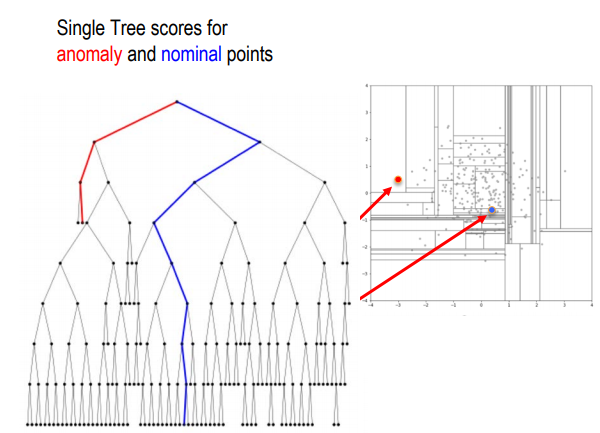
An important hyperparameter is the *Contamination*, this is a parameter that the algorithm is quite sensitive to, in fact it refers to the expected proportion of outliers in the data set.

*Isolation Forest, Fei Tony Liu ; Kai Ming Ting ; Zhi-Hua Zhou DOI: [10.1109/ICDM.2008.17]*

In [ ]:
outlierDetector = IsolationForest(n_estimators=100, max_samples='auto', contamination=float(.06), \
                        max_features=1.0, bootstrap=False, n_jobs=-1, random_state=rand, verbose=0)
outlierDetector.fit(X_train_std)
pred = outlierDetector.predict(X_train_std)
indexToDrop = X_train_std[pred==-1].index

print(f'Number of outliers found: {len(indexToDrop)}')

In order to get an idea on how the outliers are distributed across the samples, I introduced PCA in order to compute a dimensionality reduction to 3 dimensions and have a clear visualization of the outliers.

# 3.3.4 PCA - Visualization and Feature Extraction

PCA is an unsupervised algorithm that is used in the machine learning context to achieve dimensionality reduction as a tool for *data visualization* (to visualize the data for exploratory analysis by mapping the input
data into two- or three-dimensional spaces) or as a tool for *feature extraction* (to generate a smaller and more effective set of features).

In fact it is often desirable to find a lower dimensional representation preserving some of the main properties of the original dataset. This technique aims to alleviate the *curse of dimensionality*, since when we observe a very high-dimensional feature space or when there are few data points with respect to the number of features it may happen that that these data points result to be very sparse in the feature space. This causes every observation appearing equidistant from all the other data points making distance-based algorithm, such as SVM, meaningless. Moreover, there is a huge risk of overfitting. Then, dimensionality reduction techniques such as PCA can handle these issues by mapping the high-dimensional data into a lower-dimensional space.

Therefore this technique allows us to find the best representation of the given dataset in a lower subspace, by projecting data samples onto the found principal components. 

In this part of the project I exploit the Principal Component Analyisis in order to obtain a clear visualization in the feature space of the outliers individuated by the Isolation Forest algorithm.
In the next part I will exploit PCA to reduce my dataset to keep only meaningful features for the classification task.


**How PCA works?**
Let $x_1,...,x_m$ be m vectors in $R^d$. We would like to reduce the dimensionality of these vectors using a *linear* transformation. A matrix $W∈R^{n,d}$, where $n < d$, induces a mapping $x → Wx$, where $Wx$ is the lower dimensionality representation of $x$. Then, a second matrix $U∈R^{d,n}$ can be used to (approximately) recover each original vector $x$ from its compressed version. $W$ is a *compression* matrix, $U$ is a *recovery* matrix.

That is, for a compressed vector $y = Wx$, where $y$ is in the low dimensional space $R^n$, we can construct $x̄ = Uy$, so that $x̄$ is the recovered version of $x$ and resides in the original high dimensional space $R^d$.
In PCA, we aim to find the compression matrix $W$ and the recovering matrix $U$ so that the total squared distance between the original and recovered vectors is minimal:

$$\underset{W∈R^{n,d},U∈R^{d,n}}{\operatorname{arg min}} \sum_{i=1}^{m}{|| x_i - UWx_i||^2}_2$$

This means minimizing the reconstruction error.

It can be proved that the below formulation is equivalent to the first one:
    $$\underset{U∈R^{d,n}:U^{T}U=I}{\operatorname{arg max}} trace(U^T\sum_{i=1}^{m}{(x_ix_j)^TU})$$


So the problem can be riformulated by letting $A = \sum_{i=1}^{m}{x_ix_i^T}$ and letting $u_1,...,u_n$ being $n$ eigenvectors of the matrix $A$ corresponding to the largest $n$ eigenvalues of $A$. 

Then, the solution to the PCA optimization problem is to set $U$ to be the matrix whose columns are $u_1,...,u_n$, $U = [u_1,...,u_n]$, and to set $W = U^T$.

$U$ contains the so called principal components.
It is good practice to remove the mean from the data before applying PCA, so that we have $(x_1-\mu), (x_2-\mu)...(x_m-\mu)$. Then the problem can be interpreted as a Variance Maximization, in which the PCs captures a certain amount of variance in the data. 

In other words, PCA technique projects onto the subspace of maximal variance and therefore the first principal Component can be derived from the projection onto the direction of maximal variance. 
After, in hierarchical order, the other principal components and the amount of variance that they capture in the data. In other terms the first $n$ principal components of PCA can be seen as the largest $n$ eigenvectors extracted from the covariance matrix $Σ$, $Σ = XX' = \sum_{i=1}^{m}{x_ix_i^T}$ built from data vector $X$, $(x_1-\mu), (x_2-\mu)...(x_m-\mu)$.

We can say that the PCA provides us a hierarchical data driven coordinate system (each component is orthogonal to the other) to represent the statistical variation in the data, built on the directions that captures the maximum amount of variance in the data.

In [ ]:
pca =  PCA(n_components  = 3)
X_train_red  =  pd.DataFrame(pca.fit_transform(X_train_std), index = X_train_std.index)

X_train_red.columns = ['component1', 'component2','component3']
X_train_red['outliers'] = [1]*len(X_train_red)
X_train_red.loc[indexToDrop,'outliers'] = -1

fig = go.Figure(data=[go.Scatter3d(
    x=X_train_red['component1'], y=X_train_red['component2'], z=X_train_red['component3'],
    mode='markers',
    marker=dict(
        size=3,
        color = X_train_red['outliers'],
        colorscale=palette[::-1],
        opacity=0.8
    )
)])
fig.update_layout(title = '3D visualization of the outliers')
fig.show()

In [ ]:
X_train_clean = X_train_std.drop(indexToDrop)
y_train_clean = y_train.drop(indexToDrop)

In [ ]:
pca =  PCA(n_components = 3)
X_train_red  =  pd.DataFrame(pca.fit_transform(X_train_clean), index = X_train_clean.index)

X_train_red.columns = ['component1', 'component2','component3']

fig = go.Figure(data=[go.Scatter3d(
    x=X_train_red['component1'], y=X_train_red['component2'], z=X_train_red['component3'],
    mode='markers',
    marker=dict(
        size=7,
        color = y_train_clean,
        colorscale=palette,
        opacity=0.8
    )
)])
fig.update_layout(title = '3D visualization of the data')
fig.show()

I decided to apply Isolation Forest algorithm in order to remove outliers. 

In [ ]:
X_train_clean = X_train_std.drop(indexToDrop)
y_train_clean = y_train.drop(indexToDrop)

# 3.4 PCA - Dimensionality Reduction as feature Extractor
In the previous part we already knew what was the number of components in which to reduce the data, but if we want to reduce the dataset in order to retain a certain amount of variance explained we need to assess how much variance is explained by each attribute of the dataset. For this purpose I exploited the visualization tool *Pareto diagram* in order to understand what is a good trade off for the number of components.

In [ ]:
pca = PCA().fit(X_train_clean)
nVar = len(X_train_clean.columns)

fig = make_subplots(rows=1, cols=1, subplot_titles=("Cumulative Variance Explained and Variance Explained"))

fig.add_trace(
    go.Scatter(x=np.arange(1,nVar+1), y=pca.explained_variance_ratio_.cumsum(),
        name='Cumulative Variance Explained',
        line=dict(color='blue'),
        connectgaps=True),
    row=1, col=1
)
fig.add_trace(
    go.Bar(x=np.arange(1,nVar+1), y=pca.explained_variance_ratio_,
        name='Variance Explained'),
    row=1, col=1
)
fig.add_shape(
            type="line",
            x0=10,
            y0=0,
            x1=10,
            y1=1,
            line=dict(
                color="green",
                width=2,
                dash="dot",
            )
)

fig.update_layout(width = 1000, height = 600)

fig.show()

A standard method used to evaluate the number of components that should be retained, is the one related to the cumulative variance. The cumulative percentage of total variance is the percentage of variance explained by the first $m$ components.
If $l_k$ is the variance of the $k^{th}$ Principal Component then $m$, number of components, is chosen to be the smallest $m$ such that $$t_m = \frac {\sum \limits_{k=1}^{m}l_k}{\sum \limits_{k=1}^{N}l_k}$$
is between 70% and 90%.


Hence I first draw the graph of the cumulative Explained Variance Ratio of transformed training data and transformed dimensions. What we can understand from the graph is that if we want to retain at least 70% of variance explained we have to keep 10 features. Which means that with a halved number of features we should still mantain much of the information retained in the original dataset. 


*[How Many Components should be Retained from
a Multivariate Time Series PCA? Alethea Rea1 and William Rea2, 1. Centre for Applied Statistics, University of Western Australia, Australia 2. Department of Economics and Finance, University of Canterbury, New Zealand October 21, 2016
arXiv:1610.03588v2]*

# 4. Model implementation and selection
the models I will use are the 
* Random Forest algorithm
* Support Vector Machine Classifier
* Logistic Regression algorithm 
* KNN


In the first part I will experiment the behaviour of the algorithms using the reduced dataset, in the second part
I will not use the reduced dataset but the complete dataset in order to analyze two possible uses of the dataset itself:
Dimensionality reduction make computation faster and usually more performant, but we lose interpretability of the features.
In case of medical/clinical data, as previously said, readability and interpretability are two main characteristic.
I will experiment if in this case there are any advantages in implementing dimensionality reduction or it is better to guarantee interpretability of the model.

## **Random OverSampling**
As shown previously I started with a dataset that was slightly imbalanced. Since this dataset is actually a small dataset, removing outliers had however some impact on the imbalance of the dataset. Therefore I decided to apply a very easy and robust technique in order to re-balance the dataset. I decided to use Random Oversampling because we only need to introduce a small amount of samples in the dataset.

What Random Oversampling is about? It provides a naive technique for rebalancing the class distribution for an imbalanced dataset by randomly duplicating examples in the minority class. Random Oversampling is referred to as "naive resampling" method because it assume nothing about the data and no heuristics are used. 
This makes this technique intuitive, simple to implement and fast to execute, which is somehow desirable in some cases. However abusing of this technique may lead to extreme overfitting. I assumed that since the imbalance is very tiny, it won't affect too much the generalization ability of the algorithms.
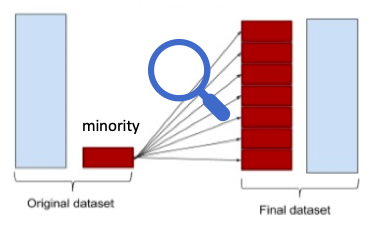

## **Model Selection and Hyperparameter tuning**:
For each model I tuned the hyperparameters by exploiting the ***GridSearchCV*** tool. In order to perform an exhaustive search of the right hyperparameters I implemented a ***GridSearch that exploit a Stratified K fold Cross Validation Splitting strategy*** (variation of KFold that returns stratified folds. The folds are made by preserving the percentage of samples for each class). Cross validation is one of the best method to evaluate the performances of a model and consequently choose a determined model guaranteeing the right variance-bias trade off. It operates by splitting the training data into $K$ subsets, using $K-1$ of them in order to train a model and validate it on the remaining subset. $K$ fold cross validation is a computationally expensive algorithm that cannot be applied in case very large dataset.  


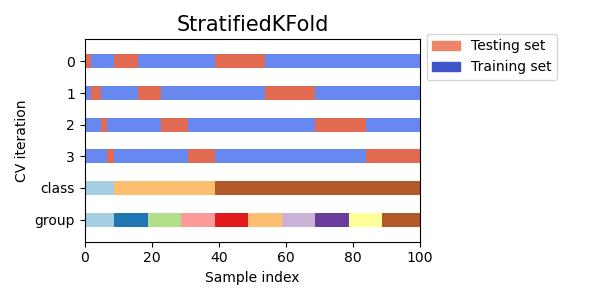


## **Performance evaluation**: 
In order to assess the performance of the classification algorithm I exploit the below cited metrics. In particular F1-score, Sensitivity, Specificity and Accuracy. By defining:
* True Positive (TP): Correctly predicted positive values. Both of predicted and actual values are
positive.
* True Negative (TN): Correctly predicted negative values. Both of predicted and actual values are
negative.
* False Positive (FP): Mispredicted positive values. When actual class is negative and predicted class
is positive.
* False Negative (FN): Mispredicted negative values. When actual class is positive but predicted
class in negative.


### Accuracy
It is one of the most used metrics for evaluating classification models:  
$\\Accuracy = \frac{\text{Number of correct predictions}}{\text{Total number of predictions}}$
A classification model’s accuracy is defined as the percentage of predictions it got right. However, it’s important to understand that it becomes less reliable when there is a severe imbalance between the classes, becoming less ideal as a stand-alone metric.

### Precision
Precision attempts to answer the following question: What proportion of positive identifications was actually correct?
Precision is a measure that tells what proportion of patients that has been diagnosed as having heart disease, actually had heart disease.
Computed as: 
$\\Precision = \frac{\text{TP}}{\text{TP + FP}}$


### Recall (or Sensitivity)
Recall attempts to answer the following question: What proportion of actual positives was identified correctly? 
Recall is a measure that tells us what proportion of patients that actually had heart disease was diagnosed by the algorithm as having heart disease.
Computed as: 
$\\Recall = \frac{\text{TP}}{\text{TP + FN}}$
The true positive ratecorresponds to the proportion of positive data points that are correctly considered as positive, with respect to all positive data points.


### F1-score
The *F1-score*  can be interpreted as the harmonic mean of the precision and recall, it tells how precise your classifier is (how many instances it classifies correctly), as well as how robust it is (it does not miss a significant number of instances). The formula for the F1 score is: 
$\\F1 score = 2*\frac{\text{(precision * recall)}}{\text{(precision + recall)}}$


### Specificity 
Specificity is also called False positive rate and corresponds to the proportion of negative data points that are mistakenly considered as positive, with respect to all negative data points. Specificity in fact, is a measure that tells us what proportion of patients that did NOT have a heart disease, were predicted by the model as NOT having a heart disease.
$\\Specificity = \frac{\text{FP}}{\text{FP + TN }}$


### Confusion matrix 
The confusion matrix can be used as a visual tool in order to have a more clear and unserstandable view of the performances of the algorithm. 
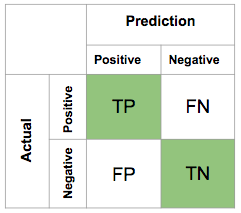




# 4.1 Random Forest

The main core element of the Random Forest Algorithm is the Decision Tree Algorithm. 
A decision tree is a simple, interpretable and non-parametric algorithm, that predicts the label associated with an instance $x$ by traveling from the root node of a tree to the leaves. Decision trees are built by splitting the predictor space into some distinct and non-overlapping hyper-rectangles, and points in the same region are classified with the same label.

A general framework for growing a decision tree is as follows:
We start with a tree with a single leaf (the root) and assign this leaf a label according to a majority vote among all labels over the training set. We now perform a series of iterations. On each iteration, we examine the effect of splitting a single leaf. We define some "gain" measure that quantifies the improvement due to this split. 
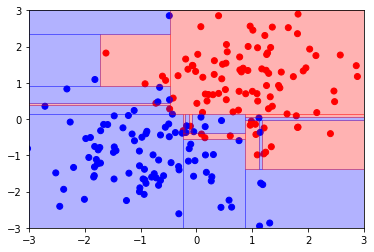


Then, among all possible splits, we either choose the one that maximizes the gain and perform it, or choose not to split the leaf at all. In general, two measures are often used in order to chose the best split:
* Gini index: defined as
$$G = 1 - \sum_{k=1}{P_{i,k} ^2}$$


where $p_i,k$ is the ratio of class $k$ instances among the training instances in the $i^{th}$ node.
It represents a measure of node "purity", therefore the smaller is the value of the Gini Index, the purest is the node. Purity is associated to the number of observations that come from the different classes, therefore a low Gini Index value means that most of the observations comes from one single class.
* Information Gain: defined in terms of Entropy

$$Entropy = \sum_{i=1}{-p_ilog_2(p_i)}$$


$$ IG  = Entropy(parent node) - WeightedAverage * Entropy(children)$$


Information Gain is the expected reduction in entropy caused by partitioning the examples according to a given attribute

Decision Trees construction adopts a top-down, greedy strategy called recursive binary splitting in which the best attribute is selected locally. 
for Decision Trees the generalization ability is overall very limited, and the risk of overfitting is constantly high.

Random Forest Algorithm was introduced in order to reduce the danger of overfitting (if using a single tree). It is an ensemble of decision trees that guarantees more robustness to the classification task and combines the predictions of the estimators to produce a more accurate prediction. 
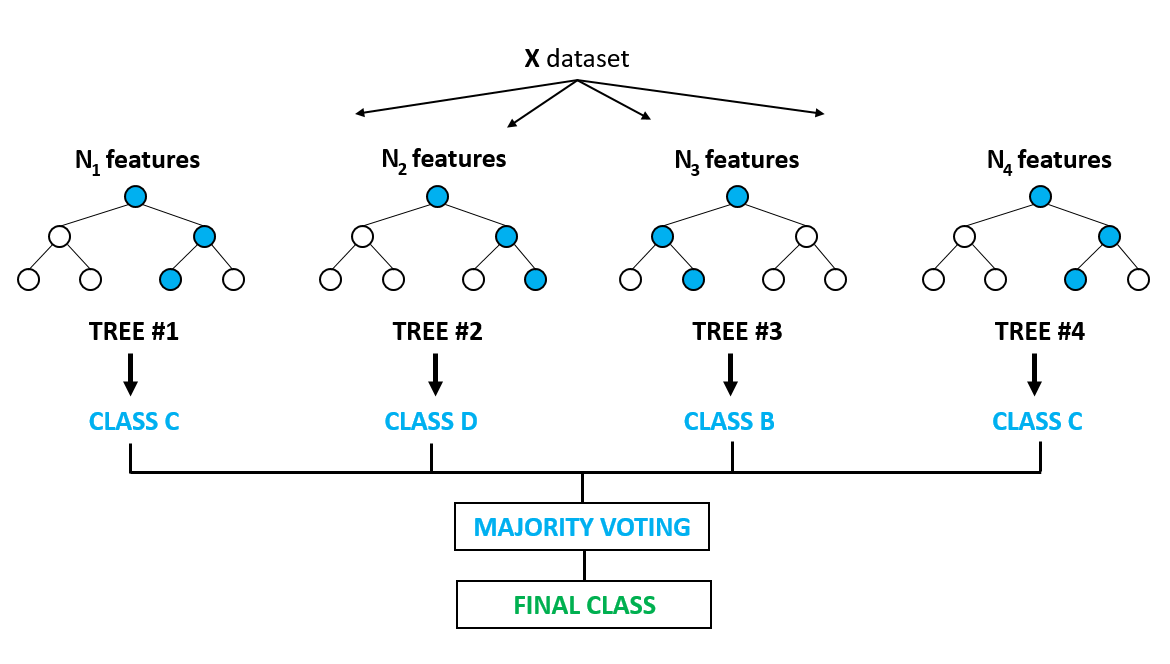
It exploits the *bagging* method, a technique that aims to reduce the variance of a statistical learning method.
Below the main steps for building a RandomForest:
1. **Bagging**
Given the training set of $N$ examples, it repeatedly sample subsets of the training data of size $n$ (the boostrapped training set), where $n$ is lower than $N$. Sampling is done at random but with *replacement*. This subsampling of a training set is called bootstrap aggregating, or bagging, for short. The advantage of bagging method is that the trees inside a Random Forest are decorrelated, reducing the variance of the model.


2. **Random subspace method**
If each training example has M features, the algorithm takes a subset of them of size $p ≤ M$ to train each estimator.Typically $ p = \sqrt{M}$.
So no estimator sees the full training set, each estimator sees only $p$ features of $n$ training examples.


3. **Training estimators**
The algorithm then creates $N_{tree}$ decision trees, or estimators, and train each one on a different set of $p$ features and $n$ training examples. The trees are not pruned, as they would be in the case of training a simple decision tree classifier.


4. **Perform inference by aggregating predictions of estimators**
To make a prediction for a new incoming example, the algorithm passes the relevant features of this example to each of the $N_{tree}$ estimators. We will obtain $N_{tree}$ predictions, which we need to combine to produce the overall prediction of the random forest. In the case of classification, it will use majority voting to decide on the predicted class.

The random forest's ensemble design allows the random forest to generalize well to unseen data, including data with missing values. Random forests are also good at handling large datasets with high dimensionality and heterogeneous feature types (for example, if one column is categorical and another is numerical) and have few hyperparameters. 

Some hyperparameters that is important to tune:
* max features: number of features to consider when training a tree. If None, all the features will be used to train the trees. The more this value is small, the lower is the risk of overfitting.
* max_depth: Sets a limit to the growth of the tree. Better if low.
* criterion: Gini or Entropy.
* n_estimators: sets the number of trees that the algorithm has to build.

In [ ]:
pca = PCA(n_components = 0.70)
def build_pipeline(pipeline, params, X_train, y_train):
    grid = GridSearchCV(pipeline, params, scoring = 'f1_weighted',
                            return_train_score=True, n_jobs = -1)
    grid.fit(X_train, y_train)
    print(f"Best parameters set found on development set: {grid.best_params_}")
    return grid

def apply_model(grid, X_test, y_test):
    y = grid.predict(X_test)
    
    c = confusion_matrix(y_test, y)
    sensitivity = c[0,0]/(c[1,0]+c[0,0])
    acc = accuracy_score(y_test,y)
    f1 = f1_score(y_test,y)
    specificity = c[1,1]/(c[1,1]+c[0,1])    

    print(classification_report(y_test,y))
    print()
    plt.figure(figsize = (7,5))
    sns.heatmap(c, annot=True)
    plt.title('Confusion Matrix')
    print()
    
    return acc,f1,specificity,sensitivity

In [ ]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.pipeline import Pipeline

RF_PCA_ros_pip = Pipeline([('pca', pca), ('ros', RandomOverSampler(random_state=rand)),
                     ('classifier', RandomForestClassifier(random_state = rand))])

RF_PCA_pip = Pipeline([('pca', pca),('classifier', RandomForestClassifier(random_state = rand))])

params_tree = {'classifier__n_estimators': [25,50,100], 'classifier__max_depth' : [5, 8], 
               'classifier__max_features': ['auto', 1,2], 'classifier__criterion' :['gini']}

### Random Forest PCA + RandomOverSampler

In [ ]:
tree_pca_ros_metrics = []
tree_grid_pca_ros = build_pipeline(RF_PCA_ros_pip, params_tree, X_train_clean, y_train_clean)
tree_pca_ros_metrics = apply_model(tree_grid_pca_ros, X_test_std, y_test)


### Random Forest PCA

In [ ]:
tree_pca_metrics = []
tree_grid_pca = build_pipeline(RF_PCA_pip, params_tree, X_train_clean, y_train_clean)
tree_pca_metrics = apply_model(tree_grid_pca, X_test_std, y_test)

# 4.2 Support Vector Classifier

Support Vector Machine is a large margin classifier, since it tries to build a hyperplane that separates the classes in the feature space, by maximizing the margin. The separating hyperplane is defined as $(w,b)$ such that $∀i, y_i(〈w, x_i〉+ b)  > 0$, where $y_i$ ∈ {$-1,1$}. 
The margin is defined as the distance of the closest data point to the hyperplane, $\underset{i∈m}{\operatorname{min}} |(〈w, x_i〉 + b|$


As previously said the optimization problem is actually maximization problem that at first comes as Hard-margin problem, or equivalently:
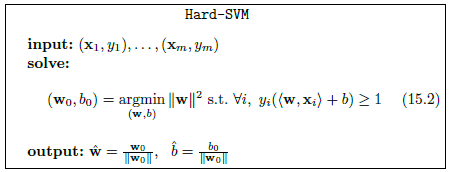

The aforementioned formulation is related to the Hard-margin SVM, in which we assume data are linearly separable.
Thanks to the introduction of the Langrange variables **$\alpha$** = $[\alpha_1,...\alpha_m]$, with $\alpha_i ≥ 0$, the weight vector $w$ at the solution of the SVM problem is a linear combination of the training set vectors $x_1,... x_m$. A vector $x_i$ appears
in the solution iff $\alpha_i≠0$. Such vectors are called support vectors. Support vectors lie on the hyperplane and the solution depends only on them.


However, since it's often impossible to find a hyperplane that perfectly separates real-world data (solving the "hard margin" problem), SVM in general solves a more "relaxed" optimization problem, which sees the introduction of the slack variables in order to allow the algorithm to make a few mistakes and therefore paying a cost for each classified example:
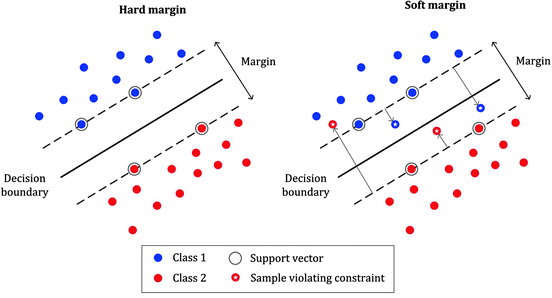


The optimization problem becomes:
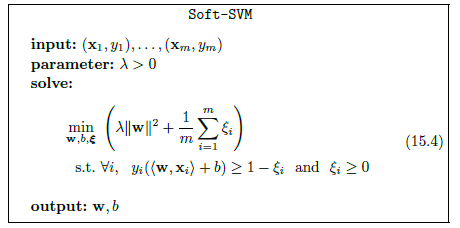
The optimization problem is then related to trading off how large it can be the margin versus how many points are going to be misclassified. 

In other words soft-margin SVMs minimize training error traded off against margin, where the parameter C determines the trade-off between margin-maximization (C is small) and the minimization of the slack penalty (C is large). Let's note that C is inversely proportional to the regularization ($C = \frac{1}{\lambda}$ ) , so it has to be accurately tuned.
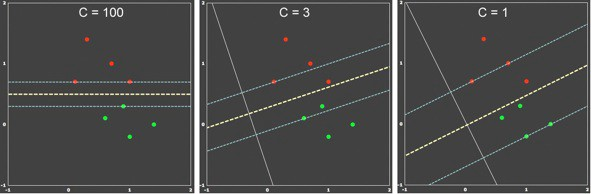

However, for data highly non-linearly separable, neither the introduction of a certain amount slack is sufficient. Therefore the kernel-trick is introduced.
The idea is then about mapping the non-linear separable data into a higher dimensional space where we can find a hyperplane that can separate the samples. The trick is that we don't have to compute directly the feature transformation, we only have to know that this equality holds: 

<$\phi(x_j)$ , $\phi(x)$> = $K(x_j, x)$

Essentially the kernel trick helps us to define a Kernel Function $K$ in terms of original space itself without even defining (or in fact, even knowing), what the transformation function  $\phi$  is. Therefore the prediction on a new instance can be computed as 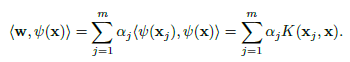
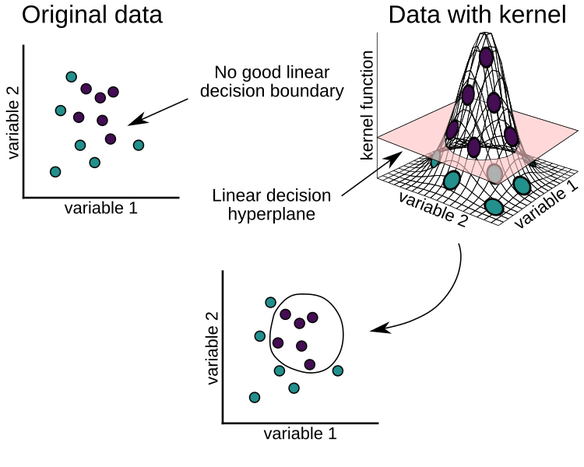

In the hyperparameter search I considered the *linear* kernel and the *Radial basis function* kernel. 
The rbf kernel, or Gaussian kernel:

$K(x,x_i) = e^{-\gamma||x - x_i||^2}$ where $\gamma$ can be considered as the spread of the kernel that has the effect on the dimension of the decision region since it is inversely proportional to the variance of the gaussian.

In [ ]:
svm_PCA_ros_pip = Pipeline([('pca', pca),('ros', RandomOverSampler(random_state=rand)),
                     ('classifier', SVC(random_state = rand))])
svm_PCA_pip = Pipeline([('pca', pca),('classifier', SVC(random_state = rand))])

params_svm = {'classifier__kernel':['linear', 'rbf'], 'classifier__C' : [0.01,0.1, 1, 10], 'classifier__gamma': ['auto','scale']}

### SVM  PCA + RandomOverSampler

In [ ]:
svm_pca_ros_metrics = []
svm_grid_pca_ros = build_pipeline(svm_PCA_ros_pip, params_svm, X_train_clean, y_train_clean)
svm_pca_ros_metrics = apply_model(svm_grid_pca_ros, X_test_std, y_test)

### SVM  PCA

In [ ]:
svm_pca_metrics = []
svm_grid_pca = build_pipeline(svm_PCA_pip, params_svm, X_train_clean, y_train_clean)
svm_pca_metrics = apply_model(svm_grid_pca, X_test_std, y_test)

# 4.3 Logistic Regression
Logistic Regression is a generalized linear model for classification that tries to assign a label by exploiting the probability that a certain sample belongs to a certain class.
Logistic Regression is mainly used to perform binary classification tasks being a more appropriate approach than simple linear regression.
Rather than fitting a line, logistic regression fits a non-linear function, the Sigmoid function, in order to have as a result a value between 0 and 1, that can be interpreted as class probability, more precisely, conditional probability that the resulting class is 1. Therefore the class is assigned if the output probability is greater/lower than a *threshold* (usually 0.5).

$P(x) = P(Y = 1 | x;w)$ is the output probability, describing the conditional probability that a sample $x$ "belongs" to class 1 and $h_w(x) = \frac{e^{〈w, x〉}}{1 + e^{〈w, x〉}}$ is the logistic function.

The logistic regression model is described by the equation:
$$P(x)  =  \frac{e^{〈w, x〉}}{1 + e^{〈w, x〉}} = \frac{e^{\beta_0 + \beta_1x}}{1 + e^{\beta_0 + \beta_1x}}$$

In which the $〈w, x〉$ is a compact representation of the linear combination of $\beta$ and $x$.

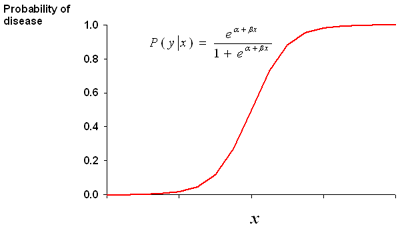


Therefore the linear relationship is expressed between the logits of the output and the parameters $$logit(p(x)) = log(\frac{p(x)}{1 - p(x)}) = 〈w, x〉$$ 

that are estimated by exploiting the maximum likelihood estimation.

Since the MLE gives the probablity of the observed classes, this means that the parameters $w$ are chosen in order to maximize it. However, the problem of Maximizing the Likelihood is equivalent to minimizing the *logistic loss function*
$$L(y_i, x_i; w) = log(1 + e^{-y_i〈w, x_i〉})$$

For correctly classified points $−y_i〈w, x_i〉$ is negative, and $log(1 + e^{-y_i〈w, x_i〉})$ is near zero.
For incorrectly classified points $−y_i〈w, x_i〉$ is positive, and $log(1 + e^{-y_i〈w, x_i〉})$ can be large.


Then the following optimization problem has to be solved:
$$\underset{W∈R^{d}}{\operatorname{arg min}} \frac{1}{m}\sum_{i=1}^{m}{L(y_i, x_i; w)}$$

For logistic regression, this loss function is conveniently convex, therefore the problem can be solved by using methods such as gradient descent.

Also in this case, C is introduced as Regularization parameter and, more precisely, the smallest the value of C, the stronger the regularization.

In [ ]:
lr_PCA_ros_pip = Pipeline([('pca', pca),('ros', RandomOverSampler(random_state=rand)),
                     ('classifier', LogisticRegression(random_state = rand))])
lr_PCA_pip = Pipeline([('pca', pca),('classifier', LogisticRegression(random_state = rand))])

params_lr = {'classifier__penalty':['l1', 'l2'], 'classifier__C' : [0.01,0.1, 1, 10]}

### Logistic Regression  PCA  + Random OverSampler

In [ ]:
lr_pca_ros_metrics = []
lr_grid_pca_ros = build_pipeline(lr_PCA_ros_pip, params_lr, X_train_clean, y_train_clean)
lr_pca_ros_metrics = apply_model(lr_grid_pca_ros, X_test_std, y_test)

### Logistic Regression PCA

In [ ]:
lr_pca_metrics = []
lr_grid_pca = build_pipeline(lr_PCA_pip, params_lr, X_train_clean, y_train_clean)
lr_pca_metrics = apply_model(lr_grid_pca, X_test_std, y_test)

# 4.4 KNN
The K-Nearest Neighbors algorithm is a supervised learning algorithm that is often used for classification. The classification is based on the calculation of the distance ( Euclidean distance is the most used) between a new data point and all the other already in the training dataset. The class of the K-nearest-neighbor will determine the class of the new data point. KNN is a proper “distance based” classifier. 
There are many possible distance functions that can be used to compute the distance such as Manhattan distance and Euclidean distance.
* Manhattan distance: $$\sum_{i=1}^{k}{|x_i - y_i|}$$

* Euclidean distance: $${\sqrt{\sum _{k=1}^{n}{(x_{k}-y_{k})^{2}}}}$$

If K = 1, then the instance is simply assigned to the same class of its nearest neighbor.
In addition to its simplicity there is the fact that there are few hyperparameters that have to be tuned (K value and distance function) in fact KNN is a nonparametric algorithm because it avoids a priori assumptions about the shape of the class boundary and can thus adapt better to nonlinear boundaries as the amount of training data increases. Furthermore KNN does not need a proper training phase, since it uses all the instances of the dataset in order to classify a data point. In fact KNN in test phase will require all the training dataset to compute for every new data point the distance from all the train data and so to implement a classification rule.

Given a K value and a distance metric the algorithm computes:
* For each point $x_i$ in the test data, the distance between the instance and each point of training data

* Then based on the distance, sort the distances in ascending order
* Consider the first K computed distances
* Assign a class to the test point $x_i$ based on majority voting.
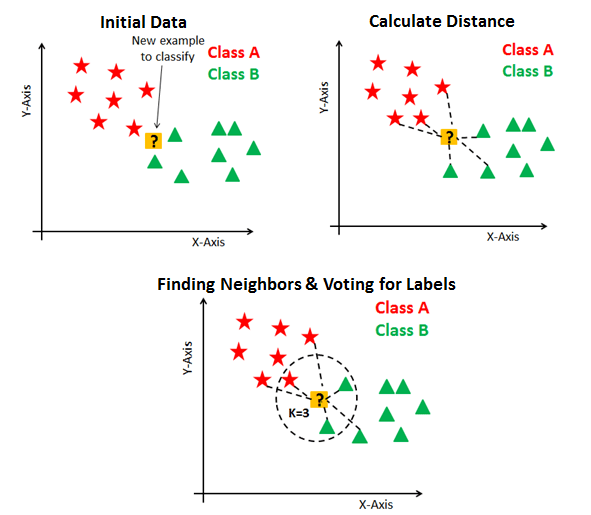

Beyond the distance metrics, the K parameter has to be correctly tuned since if we set K = 1, we let the algorithm consider, for each new point that has to be classified, only the class of its only nearest neighbor, in this case the decision boundary (defined as a surface that separates points belonging to different classes) is very irregular and granulated because we are forcing the classifier to restrict at the minimum the region of a given prediction. Under this condition, every single point creates around itself a little ‘island’ of likely incorrect decisions, also points in the middle of other ‘clusters’, and this often means that the algorithm suffers of poor generalization capacities. On the other hand if K is too big (also with respect to the size of the dataset) there is a high risk of eliminating some important details, so there is the risk of a too high level of generalization.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn_PCA_ros_pip = Pipeline([('pca', pca),('ros', RandomOverSampler(random_state=rand)),
                     ('classifier', KNeighborsClassifier())])
knn_PCA_pip = Pipeline([('pca', pca), ('classifier', KNeighborsClassifier())])

params_knn = {'classifier__n_neighbors':[3,5,7,8], 'classifier__p':[1,2]}

### KNN PCA + Random OverSampling

In [ ]:
knn_pca_ros_metrics = []
knn_grid_pca_ros = build_pipeline(knn_PCA_ros_pip, params_knn, X_train_clean, y_train_clean)
knn_pca_ros_metrics = apply_model(knn_grid_pca_ros, X_test_std, y_test)

### KNN PCA

In [ ]:
knn_pca_metrics = []
knn_grid_pca = build_pipeline(knn_PCA_pip, params_knn, X_train_clean, y_train_clean)
knn_pca_metrics = apply_model(knn_grid_pca, X_test_std, y_test)

# 4.5 Learning Curves

Learning Curves are a useful visualization tool that shows the validation and training score of an estimator for varying numbers of training samples. It is a tool to find out how much we benefit from adding more training data and whether the estimator suffers more from a variance error or a bias error, hence from overfitting or underfitting.

The bias-variance dilemma is the conflict in trying to simultaneously minimize these two sources of error that prevent supervised learning algorithms from generalizing beyond their training set. Therefore a *high bias* can cause an algorithm to miss the relevant relations between features and target outputs (underfitting), whether a high variance can cause an algorithm to model the random noise in the training data, rather than the intended outputs (overfitting).

Bias and variance are intrinsic properties of an estimator and it can be helpful, in order to select learning algorithms and hyperparameter in order to have both bias and variance are as low as possible, to have a visualization of these curves. The Train Learning Curve can indicates how well the model is learning, wether the Validation Learning Curve shows how well the model is generalizing. 



In [ ]:
def plot_learning_curve(estimator, title, X, y, axes=None, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
   
    if axes is None:
        _, axes = plt.subplots(1, 2, figsize=(20, 5))
    axes.set_title(title)
    if ylim is not None:
        axes.set_ylim(*ylim)
    axes.set_xlabel("Training examples")
    axes.set_ylabel("Score")
    
    train_sizes, train_scores, test_scores, fit_times, _ = \
        learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs,
                       train_sizes=train_sizes,
                       return_times=True)
    
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    axes.grid()
    axes.fill_between(train_sizes, train_scores_mean - train_scores_std,
                         train_scores_mean + train_scores_std, alpha=0.1,
                         color="r")
    axes.fill_between(train_sizes, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1,
                         color="g")
    axes.plot(train_sizes, train_scores_mean, 'o-', color="r",
                 label="Training score")
    axes.plot(train_sizes, test_scores_mean, 'o-', color="g",
                 label="Cross-validation score")
    axes.legend(loc="best")
    return plt

### Learning Curves PCA + RandomOverSampler

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(17, 10))

title = "Learning Curves (Random Forest) - PCA ROS"

cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=42)

plot_learning_curve(tree_grid_pca_ros.best_estimator_, title, X_train_clean, y_train_clean, axes = axes[0][0], ylim=(0.7, 1.01),
                    cv=cv, n_jobs=4)

title = r"Learning Curves (SVM) - PCA ROS"
plot_learning_curve(svm_grid_pca_ros.best_estimator_, title,  X_train_clean, y_train_clean, axes = axes[0][1], ylim=(0.7, 1.01),
                    cv=cv, n_jobs=4)

title = r"Learning Curves (Logistic Regression) - PCA ROS"

plot_learning_curve(lr_grid_pca_ros.best_estimator_, title,  X_train_clean, y_train_clean, axes = axes[1][0], ylim=(0.7, 1.01),
                    cv=cv, n_jobs=4)

title = r"Learning Curves (KNN) - PCA ROS"
plot_learning_curve(knn_grid_pca_ros.best_estimator_, title,  X_train_clean, y_train_clean, axes = axes[1][1], ylim=(0.7, 1.01),
                    cv=cv, n_jobs=4)
plt.show()

### Learning Curves PCA

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(17, 10))

title = "Learning Curves (Random Forest) - PCA "

cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=42)
plot_learning_curve(tree_grid_pca.best_estimator_, title, X_train_clean, y_train_clean, axes = axes[0][0], ylim=(0.7, 1.01),
                    cv=cv, n_jobs=4)

title = r"Learning Curves (SVM) - PCA"
plot_learning_curve(svm_grid_pca.best_estimator_, title,  X_train_clean, y_train_clean, axes = axes[0][1], ylim=(0.7, 1.01),
                    cv=cv, n_jobs=4)

title = r"Learning Curves (Logistic Regression) - PCA"
estimator = lr_grid_pca_ros.best_estimator_
plot_learning_curve(lr_grid_pca, title,  X_train_clean, y_train_clean, axes = axes[1][0], ylim=(0.7, 1.01),
                    cv=cv, n_jobs=4)

title = r"Learning Curves (KNN) - PCA"

plot_learning_curve(knn_grid_pca.best_estimator_, title,  X_train_clean, y_train_clean, axes = axes[1][1], ylim=(0.7, 1.01),
                    cv=cv, n_jobs=4)
plt.show()

Is it possible to observe that:
* Random Forest algorithm suffers from poor generalization. The gap between the training curve and the validation curve is very large (in validation it looses about 15% in accuracy). Wheter in the SVM and the Logistic Regression the amount of overfitting is negligible. 
* Adding more samples enhance the performances of the algorithm visibly for the Logistic Regression
* KNN suffers from overfitting

# 5. No dimensionality reduction
In this case I will experiment the same algorithm. Contrarily to the previous experiment I will no exploit the Principal Component Analysis, this is because in this experiment I want to mantain a certain degree of interpretability in order to give an intuitive interpretation of the model exploiting Feature Importances methods and the SHAP values, in order to interpret the impact of having a certain value for a given feature in comparison to the prediction we'd make if that feature took some baseline value.

# 5.1 Random Forest - no PCA

In [ ]:
tree_ros_pip = Pipeline([('ros', RandomOverSampler(random_state=rand)),
                     ('classifier', RandomForestClassifier(random_state = rand))])
tree_pip = Pipeline([('classifier', RandomForestClassifier(random_state = rand))])

params_tree = {'classifier__n_estimators': [25,50,100], 'classifier__max_depth' : [5], 
               'classifier__max_features': ['auto',1,2], 'classifier__criterion' :['gini']}

### Random Forest + Random OverSampler

In [ ]:
tree_ros_metrics = []
tree_grid_ros = build_pipeline(tree_ros_pip, params_tree, X_train_clean, y_train_clean)
tree_ros_metrics = apply_model(tree_grid_ros, X_test_std, y_test)

### Random Forest and no preprocessing techinques

In [ ]:
tree_metrics = []
tree_grid = build_pipeline(tree_pip, params_tree, X_train_clean, y_train_clean)
tree_metrics = apply_model(tree_grid, X_test_std, y_test)

# 5.1.1 Feature Importance - Random Forest
*Why do we need feature importance?* 
Feature importance scores can provide insight into the dataset and into the model. The relative scores can highlight which features may be the most relevant to the target, and the converse, which features are the least relevant. This may be interpreted by a domain expert and could be used as the basis for gathering more or different data. This is a type of model interpretation that can be performed for those models that support it.

Feature importance in Random Forest is calculated as the *decrease in node impurity* weighted by the probability of reaching that node. The node probability can be calculated by the number of samples that reach the node, divided by the total number of samples. The higher the value the more important the feature.
In scikit-learn feature importance is computed for each tree by using the Gini Index or *mean decrease impurity*.
Since in the internal node, the selected feature is used to make decision on how to divide the data set into two separate sets, the importance of node j is computed as:
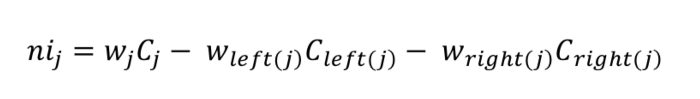
where
$w_j$ is the weighted number of samples reaching node j ($w_{left_j}$ and $w_{right_j}$ represents respectively the child node from left and from right split). $C_j$ is the impurity value of node j.
The feature importance on each tree is computed as:
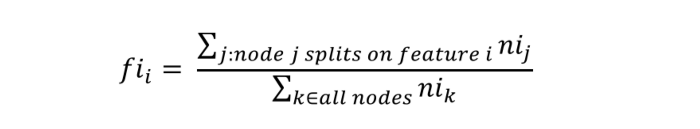
where
$fi_i$ is the importance of feature i
and $ni_j$ is the importance of node j
Then, each $fi_i$ is normalized, and finally at the Random Forest level, the feature importance is computed by averaging its value over all the trees. The sum of the feature’s importance value on each trees is calculated and divided by the total number of trees:
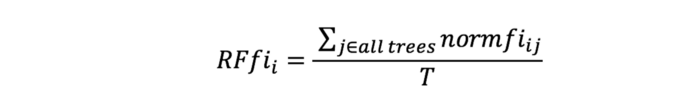
$RFfi_i$ is the importance of feature i calculated from all trees in the Random Forest model
$normfi_ij$ is then the normalized feature importance for i in tree j and 
$T$ is the total number of trees

In [ ]:
importances = tree_grid_ros.best_estimator_[1].feature_importances_
std = np.std([importances for tree in tree_grid.best_estimator_[0].estimators_],
             axis=0)
indices = np.argsort(importances)

p = sns.color_palette('Spectral', len(indices))

plt.figure(figsize = (12,5))
plt.title("Feature importances - RandomForest")
plt.barh(range(X.shape[1]), importances[indices], color = 'blue', yerr=std[indices], align="center")
plt.yticks(range(X.shape[1]), X_train_clean.columns[indices], rotation = 'horizontal')
# plt.xlim([-1, X.shape[1]])
plt.show()


# 5.2 SVM - no PCA

In [ ]:
svm_ros_pip = Pipeline([('ros', RandomOverSampler(random_state=rand)),
                     ('classifier', SVC(random_state = rand))])
svm_pip = Pipeline([('classifier', SVC(random_state = rand))])

params_svm = {'classifier__kernel':['linear'], 'classifier__C' : [0.01,0.1, 1, 10]}

### SVM + Random OverSampler

In [ ]:
svm_ros_metrics = []
svm_grid_ros = build_pipeline(svm_ros_pip, params_svm, X_train_clean, y_train_clean)
svm_ros_metrics = apply_model(svm_grid_ros, X_test_std, y_test)

### SVM and no Preprocessing Techinques

In [ ]:
svm_metrics = []
svm_grid = build_pipeline(svm_pip, params_svm, X_train_clean, y_train_clean)
svm_metrics = apply_model(svm_grid, X_test_std, y_test)

# 5.2.1 Feature importance - SVM 
It is possible to determine which are the most contributing features in this classification problem by observing the returned coefficients. However this is possible only when the kernel is Linear, because, for other kernels such as rbf, data are transformed by a kernel method to another space, which is not related to input space.
In fact, in linear SVM the separating hyperplane is in the same space as the input features so that we can view its coefficients as weights of the input "dimensions".

Then, once a linear SVM is trained, the coefficients can be accessed from the model by using svm.coef_. Recalling that a linear SVM creates a hyperplane that uses support vectors to maximise the distance between the two classes, the weights obtained from the coefficients represent the vector coordinates which are orthogonal to the hyperplane and their direction indicates the predicted class. The absolute size of the coefficients in relation to each other can then be used to determine feature importance for the data separation task.

In [ ]:
imp,names = zip(*sorted(zip(svm_grid_ros.best_estimator_[1].coef_[0],X_train_clean.columns)))
colors = ['red' if c < 0 else 'blue' for c in imp]
p1 = sns.color_palette('Spectral', len(names))

plt.figure(figsize = (12,5))
plt.barh(range(len(names)), imp, align='center', color = colors)
plt.yticks(range(len(names)), names)
plt.title("Feature importances - SVM")
plt.legend()
plt.show()


# 5.3 Logistic Regression

In [ ]:
lr_ros_pip = Pipeline([('ros', RandomOverSampler(random_state=rand)),
                     ('classifier', LogisticRegression(random_state = rand))])
lr_pip = Pipeline([('classifier', LogisticRegression(random_state = rand))])

params_lr = {'classifier__C' : [0.01,0.1, 1, 10]}

### Logistic Regression + Random OverSampler

In [ ]:
lr_ros_metrics = []
lr_grid_ros = build_pipeline(lr_ros_pip, params_lr, X_train_clean, y_train_clean)
lr_ros_metrics = apply_model(lr_grid_ros, X_test_std, y_test)

### Logistic Regression and no PreProcessing Techinques

In [ ]:
lr_metrics = []
lr_grid = build_pipeline(lr_pip, params_lr, X_train_clean, y_train_clean)
lr_metrics = apply_model(lr_grid, X_test_std, y_test)

# 5.3.1 Features Importance - Logistic Regression

For each class, the vector of coefficients $\beta_1, \beta_2 ... \beta_k$ can be used to interpret the model globally; in the absence of interaction terms, the coefficient of a predictor (i.e., independent variable) represents the change in log odds when the predictor changes by one unit while all other variables are kept at fixed values. Equivalently, the exponentiated coefficient is equivalent to a change in odds. Since the transformation from odds to outcome probabilities is monotonic, a change in odds also implies a change in the outcome probability in the same direction. Thus, the magnitudes of the feature coefficients measure the effect of a predictor on the output and thus one can globally interpret the logistic regression model.

In [ ]:
imp,names = zip(*sorted(zip(lr_grid_ros.best_estimator_[1].coef_[0],X_train_clean.columns)))
colors = ['red' if c < 0 else 'blue' for c in imp]
p1 = sns.color_palette('Spectral', len(names))

plt.figure(figsize = (12,5))
plt.barh(range(len(names)), imp, align='center', color = colors)
plt.yticks(range(len(names)), names)
plt.title("Feature importances - Logistic Regression")
plt.legend()
plt.show()

# 5.4 KNN no PCA

### KNN + Random OverSampler

In [ ]:
knn_ros_pip = Pipeline([('ros', RandomOverSampler(random_state=rand)),
                     ('classifier', KNeighborsClassifier())])
knn_pip = Pipeline([('classifier', KNeighborsClassifier())])

params_knn = {'classifier__n_neighbors':[3,4,7,8], 'classifier__p':[1,2]}

In [ ]:
knn_ros_metrics = []
knn_grid_ros = build_pipeline(knn_ros_pip, params_knn, X_train_clean, y_train_clean)
knn_ros_metrics = apply_model(knn_grid_ros, X_test_std, y_test)

### KNN and no Prepreprocessing techniques

In [ ]:
knn_metrics = []
knn_grid = build_pipeline(knn_pip, params_knn, X_train_clean, y_train_clean)
knn_metrics = apply_model(knn_grid, X_test_std, y_test)

# 5.5 Learning Curves

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(17, 10))

title = "Learning Curves (Random Forest) - ROS "

cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=42)
plot_learning_curve(tree_grid_ros.best_estimator_, title, X_train_red, y_train_clean, axes = axes[0][0], ylim=(0.7, 1.01),
                    cv=cv, n_jobs=4)

title = r"Learning Curves (SVM) - ROS"
plot_learning_curve(svm_grid_ros.best_estimator_, title,  X_train_red, y_train_clean, axes = axes[0][1], ylim=(0.7, 1.01),
                    cv=cv, n_jobs=4)

title = r"Learning Curves (Logistic Regression) - ROS"
plot_learning_curve(lr_grid_ros.best_estimator_, title,  X_train_red, y_train_clean, axes = axes[1][0], ylim=(0.7, 1.01),
                    cv=cv, n_jobs=4)

title = r"Learning Curves (KNN) - ROS"

plot_learning_curve(knn_grid_ros, title,  X_train_clean, y_train_clean, axes = axes[1][1], ylim=(0.7, 1.01),
                    cv=cv, n_jobs=4)
plt.show()

### Learning Curves without any preprocessing technique

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(17,10))

title = "Learning Curves (Random Forest) "

cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=rand)
plot_learning_curve(tree_grid.best_estimator_, title, X_train_red, y_train_clean, axes = axes[0][0], ylim=(0.7, 1.01),
                    cv=cv, n_jobs=4)

title = r"Learning Curves (SVM) "
plot_learning_curve(svm_grid.best_estimator_, title,  X_train_red, y_train_clean, axes = axes[0][1], ylim=(0.7, 1.01),
                    cv=cv, n_jobs=4)

title = r"Learning Curves (Logistic Regression)"
plot_learning_curve(lr_grid.best_estimator_, title,  X_train_red, y_train_clean, axes = axes[1][0], ylim=(0.7, 1.01),
                    cv=cv, n_jobs=4)
title = r"Learning Curves (KNN)"
estimator = knn_grid.best_estimator_
plot_learning_curve(knn_grid.best_estimator_, title,  X_train_clean, y_train_clean, axes = axes[1][1], ylim=(0.7, 1.01),
                    cv=cv, n_jobs=4)
plt.show()

For Random Forest algorithm introducing the PCA has somehow increased the amount of overfitting.
For the KNN the level of overfitting is sligthly decreased.
However for SVM and Logistic Regression the two curves converges minimizing the tiny amount of overfitting observed before. In fact adding more training samples seems to likely increase the generalization ability of the two algorithms.

# 6. Explanation of the model - KernelSHAP - Logistic Regression
Interpretability is the degree to which a human can understand the cause of a decision.
Interpretability of a model is required in many cases in order to understand why a certain prediction is made by the model itself. Not only it can be helpful to detecting biases at the time of model development, but in many application the model requires a high building trust. In case of data driven method to medical decision, is preferred to have an explanation of what's happening in the black box. For this purpose the SHAP method is introduced.

The question that SHAP approach want to answer is, for an instance $x$, with a predicted output $y$, what made the model do this decision? In the case of this Heart Disease dataset, 
if a patient has been classified as healthy, what is the contribution of each feature to this prediction?


SHAP (SHapley Additive exPlanation) is an approach that comes from game theory. The goal of SHAP is to explain the prediction of any instance $x_i$ by computing the sum of the contributions from each individual feature to the prediction and then compute the average of the marginal contributions across all the possible permutations. In SHAP approach each feature is supposed to be in a cooperative game, and in this setting Shapley values provide a means to fairly distribute the contributions across the features.

One innovation that SHAP brings to the table is that the Shapley value explanation is represented as an additive feature attribution method, a linear model.



In other words, the feature values of a data instance act as players in a coalitional game. Shapley values tell us how to fairly distribute the prediction among the features. A *player* can be an individual feature value or can also be a group of feature values. In the context of a machine learning model, individual feature values of the instance $x_i$ are the players and the prediction $y_i$ minus the average prediction for whole training data is the *payout*. However the exact computation of the Shapley values can be quite challenging, since, if there are $n$ *players*, then $n$-factorial possible sequences are considered, therefore there are some methods that apply to machine learning algorithms that optimize these computations.

Kernel SHAP is a model agnostic method to estimate SHAP values for any model. Because it makes no assumptions about the model type. 
For this purpose I use SHAP framework, that enables any Machine Learning algorithm to essentially become “explained” by providing intuitive and interactive visualizations that aim at showing which features are more relevant for a certain prediction and for the model as a whole.

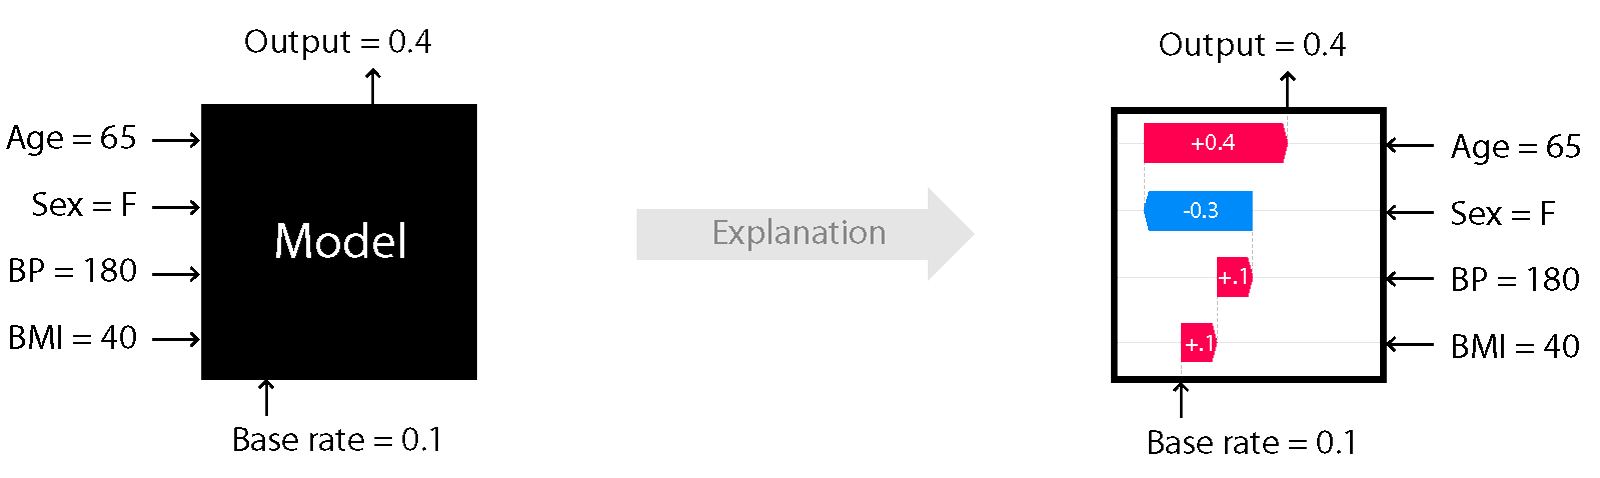

In [ ]:
explainer = shap.KernelExplainer(lr_grid_ros.best_estimator_[1].predict_proba, data = X_train, link = 'logit')
shap_values = explainer.shap_values(X_test, n_samples = 50)

In [ ]:
print(f'length of SHAP values: {len(shap_values)} as the number of classes') #as the number of classes

# 6.1 Force Plot
This plot allow us to give explainability to a single model prediction.
In particular red and blue arrows are associated with each feature, in fact each arrow shows how much the feature impacts the model (bigger arrows are associated with a high impact on the decision). Moreover, a red arrow increases the model output value, while the blue arrow decreases the model output value, starting from the baseline. The baseline for Shapley values is the average of all predictions.

In [ ]:
shap.initjs()
shap.force_plot(explainer.expected_value[0], shap_values[0][12,:], features = X_test.iloc[12,:], link = 'logit')

In [ ]:
shap.force_plot(explainer.expected_value[1], shap_values[1][12,:], features = X_test.iloc[12,:], link = 'logit')

The two force plots are associated with the same input, but separated for each target:
the first one explains that the output probability of the input belonging to class = 0 is 0.06, and in order to make that decision the values in red have positively contributed to return a very low probability of being in class 0, and the values in blue has negatively contributed (make the probability lower). Therefore they give us an explanation on "why" this patient has a low risk of heart disease. In the other graph explained how each feature has contributed negatively to the classification, therefore "why" this patient is instead classified as having a high risk.

# 6.2 Summary Plot
The chart below provide a visualization of a general evaluation of feature relevance on the model as a whole. 
The summary plot is built by considering:
1. Feature importance: Variables are ranked in descending order.
2. Impact: The horizontal location shows whether the effect of that value is associated with a higher or lower prediction.
3. Original value: Color shows whether that variable is high (in red) or low (in blue) for that observation.
4. The x-axis represents the SHAP value, which is the impact on the model output.


The first chart has some additional information, since it considers the feature relevance for each individual prediction (depicted as a point). Also, for each feature, it shows how a higher or lower value of that feature influences the fact that it agrees or disagrees with the prediction. The summary plot instead gives us a general overview on how each feature contributes in general to the model.



In [ ]:
explainer = shap.KernelExplainer(lr_grid_ros.best_estimator_.predict_proba, data = X_train_clean, link = 'logit')
shap_values = explainer.shap_values(X_test_std, n_samples = 50)

In [ ]:
shap.summary_plot(shap_values[0], X_test_std)

# Conclusions
In conclusion, PCA didn't affected much the results of the classification task.
However the introduction of the Random Oversampling has stabilized the f1_score, making the algorithms less biased toward the class 1 (the majority).
However, since the number of samples is quite limited results, in terms of accuracy reached at most (roughly) 85%. 
The model for which the Sensitivity is more balanced with the Specificity is the LogisticRegression, this means that the model is good for catching actual cases of the disease but they also come with a fairly high rate of false positives.

Nevertheless, the limited size of the dataset introduced other issues such as the impossibility of reducing the variance of the models under a certain threshold. In fact, the performances of the models depends on the split, making the algorithms not so robust.
Overall, for this kind of dataset neither with the introduction of many preprocessing steps it is possible reach realiable levels of accuracy. Therefore I think that the main goal for this dataset can be to give an insight on the models black box and not to obtain a powerful predictor.

In [ ]:
metrics = pd.DataFrame(np.array([tree_pca_ros_metrics, tree_pca_metrics, tree_ros_metrics, tree_metrics,
                                svm_pca_ros_metrics, svm_pca_metrics, svm_ros_metrics, svm_metrics,
                                lr_pca_ros_metrics, lr_pca_metrics, lr_ros_metrics, lr_metrics,
                                knn_pca_ros_metrics, knn_pca_metrics, knn_ros_metrics, knn_metrics]).reshape(4, 16),
                       index = ['Accuracy', 'F1_score', 'Specifivity', 'Sensitivity'],
                       columns = ['RandomForest PCA ROS', 'RandomForest PCA', 'RandomForest ROS', 'RandomForest',
                                'SVM PCA ROS', 'SVM PCA','SVM ROS','SVM',
                                'LogisticRegression PCA ROS','LogisticRegression PCA',
                                'LogisticRegression ROS','LogisticRegression',
                                 'KNN PCA ROS', 'KNN PCA', 'KNN ROS','KNN']
                      )
px.bar(metrics, barmode = 'group', height = 450, width = 1000)